# **1.	Data Collection**

In [28]:
# Importing libraries
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For web scraping
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization


### **1.1 Historical BTC prices:**
The dataset includes daily Bitcoin prices from May 2018 to September 2024 from Investing.com

In [70]:
# Load dataset
BTC_USD_Historical_Data = pd.read_csv('BTC_USD Historical Data.csv')

# Rename columns in BTC data
BTC_USD_Historical_Data = BTC_USD_Historical_Data.rename(columns={
    'Price': 'BTC_Price',
    'Open': 'BTC_Open',
    'High': 'BTC_High',
    'Low': 'BTC_Low',
    'Vol.': 'BTC_Vol.',
    'Change': 'BTC_Change'
})

BTC_USD_Historical_Data

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change %
0,09/30/2024,"63,468.0","65,762.0","65,762.0","63,006.0",1.04K,-3.49%
1,09/29/2024,"65,762.0","66,015.0","66,193.0","65,574.0",0.09K,-0.38%
2,09/28/2024,"66,015.0","65,928.0","66,410.0","65,568.0",0.11K,0.13%
3,09/27/2024,"65,928.0","65,307.0","66,548.0","64,987.0",0.67K,0.95%
4,09/26/2024,"65,307.0","63,264.0","65,856.0","62,805.0",0.86K,3.23%
...,...,...,...,...,...,...,...
3554,01/05/2015,273.2,261.0,276.5,260.5,2.68K,5.57%
3555,01/04/2015,258.8,282.0,288.9,258.8,2.38K,-8.23%
3556,01/03/2015,282.0,314.8,314.8,282.0,1.30K,-10.51%
3557,01/02/2015,315.1,313.6,316.0,313.0,1.32K,0.40%


### **1.2	Economic Indicators:**
Data on various economic indicators, including  S&P 500, oil prices, gold prices, and other relevant economic variables, were collected from Investing.com, Argam.com, and EIA.com.
For brent_oil, we used API to extract data from a website. These indicators were integrated to clarify the potential economic factors influencing Bitcoin prices.

In [30]:
# For brent_oil, we used API to extract data from a website

# API Data Fetch: Brent Oil
url = "https://api.eia.gov/v2/petroleum/pri/spt/data/"
params = {
    "api_key": "ID2PfupJmuavOIyurfbifgqnSUItjTtwWQCjyJcM",
    "frequency": "daily",
    "data[0]": "value",
    "facets[series][]": "RBRTE",
    "start": "2015-01-01",
    "end": "2024-09-30",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

# Fetch the data
response = requests.get(url, params=params)
if response.status_code == 200:
    data = response.json()
    records = data.get("response", {}).get("data", [])
    brent_oil = pd.DataFrame(records)[['period', 'value']].rename(
        columns={'period': 'Date', 'value': 'BrentOil_Price'}
    )
    brent_oil['Date'] = pd.to_datetime(brent_oil['Date'])
    brent_oil.to_excel("BrentOil.xlsx", index=False)
    print("Brent Oil data saved to 'BrentOil.xlsx'")
else:
    print(f"Failed to fetch Brent Oil data. Status code: {response.status_code}")


Brent Oil data saved to 'BrentOil.xlsx'


In [31]:
# Load Other Datasets
dowjones_data = pd.read_csv('Dow Jones .csv')
nasdaq_data = pd.read_csv('NASDAQ .csv')
gold_data = pd.read_excel('Gold.xlsx')
SP_data = pd.read_csv('S&P 500.csv')

# Convert Dates and Select Relevant Columns
datasets = [BTC_USD_Historical_Data, dowjones_data, nasdaq_data, gold_data, SP_data, brent_oil]
for df in datasets:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Select relevant columns and rename for consistency
dowjones_data = dowjones_data[['Date', 'Price']].rename(columns={'Price': 'DowJones_Price'})
nasdaq_data = nasdaq_data[['Date', 'Price']].rename(columns={'Price': 'Nasdaq_Price'})
SP_data = SP_data[['Date', 'Price']].rename(columns={'Price': 'S&P_Price'})


### **Merge for Historical BTC prices & Economic Indicators**

In [69]:
# Merge Datasets
# Merge all datasets using an outer join to preserve all dates
HE = BTC_USD_Historical_Data
HE = pd.merge(HE, dowjones_data, on='Date', how='outer')
HE = pd.merge(HE, nasdaq_data, on='Date', how='outer')
HE = pd.merge(HE, SP_data, on='Date', how='outer')
HE = pd.merge(HE, gold_data, on='Date', how='outer')
HE = pd.merge(HE, brent_oil, on='Date', how='outer')

# Sort data by date for consistency
HE = HE.sort_values(by='Date').reset_index(drop=True)

# Final Output
HE

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change %,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price
0,2015-01-01,313.9,317.5,317.5,312.9,0.93K,-0.99%,NaN,NaN,NaN,1185.4,NaN
1,2015-01-02,315.1,313.6,316.0,313.0,1.32K,0.40%,"17,832.99","4,726.81","2,058.20",1187.6,55.38
2,2015-01-03,282.0,314.8,314.8,282.0,1.30K,-10.51%,NaN,NaN,NaN,1189.8,NaN
3,2015-01-04,258.8,282.0,288.9,258.8,2.38K,-8.23%,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,273.2,261.0,276.5,260.5,2.68K,5.57%,"17,501.65","4,652.57","2,020.60",1204.0,51.08
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,2024-09-26,"65,307.0","63,264.0","65,856.0","62,805.0",0.86K,3.23%,"42,175.11","18,190.29","5,745.37",2694.9,73.06
3556,2024-09-27,"65,928.0","65,307.0","66,548.0","64,987.0",0.67K,0.95%,"42,313.00","18,119.59","5,738.17",2644.3,71.63
3557,2024-09-28,"66,015.0","65,928.0","66,410.0","65,568.0",0.11K,0.13%,NaN,NaN,NaN,NaN,NaN
3558,2024-09-29,"65,762.0","66,015.0","66,193.0","65,574.0",0.09K,-0.38%,NaN,NaN,NaN,NaN,NaN


## **Pre-processing for Historical BTC prices & Economic Indicators**

In [42]:
# Step 1: Convert 'BTC_Vol.' to numeric using the existing function
def convert_volume(value):
    if isinstance(value, str):  # Only process strings
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000  # Convert 'K' to thousands
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000  # Convert 'M' to millions
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000  # Convert 'B' to billions
        else:
            return float(value)  # Convert other strings to float
    return value  # Return the value as is if it's not a string

# Apply the function to the BTC_Vol. column
HE['BTC_Vol.'] = HE['BTC_Vol.'].apply(convert_volume)

In [44]:
# Step 2: Remove commas and strip whitespace from the columns, ensuring we work with strings first
columns_to_clean = ['BTC_Price', 'BTC_Open', 'BTC_High', 'BTC_Low', 'DowJones_Price', 'Nasdaq_Price', 'S&P_Price', 'BrentOil_Price']
for col in columns_to_clean:
    # Convert to string first (in case it has been converted to numeric) before applying string operations
    HE[col] = HE[col].astype(str).str.replace(',', '').str.strip()

# Step 3: Convert columns to numeric with error handling
numeric_columns = ['BTC_Price', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Vol.',
                   'DowJones_Price', 'Nasdaq_Price', 'S&P_Price', 'Gold_Price', 'BrentOil_Price']

# Convert the columns to numeric, coercing errors into NaN
for col in numeric_columns:
    HE[col] = pd.to_numeric(HE[col], errors='coerce')

# Step 4: Clean 'Change %' column by converting to decimal
def clean_percentage(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '').strip()) / 100  # Convert to decimal
    return value

# Apply the percentage conversion function to 'Change %'
HE['Change %'] = HE['Change %'].apply(clean_percentage)

In [58]:
# Step 5: Reapply the conversion for all columns to ensure the 'Change %' is correctly converted
numeric_columns = ['BTC_Price', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Vol.',
                   'DowJones_Price', 'Nasdaq_Price', 'S&P_Price', 'Gold_Price',
                   'BrentOil_Price', 'Change %']

# Convert all applicable columns to numeric types
for col in numeric_columns:
    HE[col] = pd.to_numeric(HE[col], errors='coerce')

# Step 6: Inspect the DataFrame after preprocessing
HE

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change %,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price
0,2015-01-01,313.9,317.5,317.5,312.9,930.0,-0.0099,NaN,NaN,NaN,1185.4,NaN
1,2015-01-02,315.1,313.6,316.0,313.0,1320.0,0.0040,17832.99,4726.81,2058.20,1187.6,55.38
2,2015-01-03,282.0,314.8,314.8,282.0,1300.0,-0.1051,NaN,NaN,NaN,1189.8,NaN
3,2015-01-04,258.8,282.0,288.9,258.8,2380.0,-0.0823,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,273.2,261.0,276.5,260.5,2680.0,0.0557,17501.65,4652.57,2020.60,1204.0,51.08
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,2024-09-26,65307.0,63264.0,65856.0,62805.0,860.0,0.0323,42175.11,18190.29,5745.37,2694.9,73.06
3556,2024-09-27,65928.0,65307.0,66548.0,64987.0,670.0,0.0095,42313.00,18119.59,5738.17,2644.3,71.63
3557,2024-09-28,66015.0,65928.0,66410.0,65568.0,110.0,0.0013,NaN,NaN,NaN,NaN,NaN
3558,2024-09-29,65762.0,66015.0,66193.0,65574.0,90.0,-0.0038,NaN,NaN,NaN,NaN,NaN


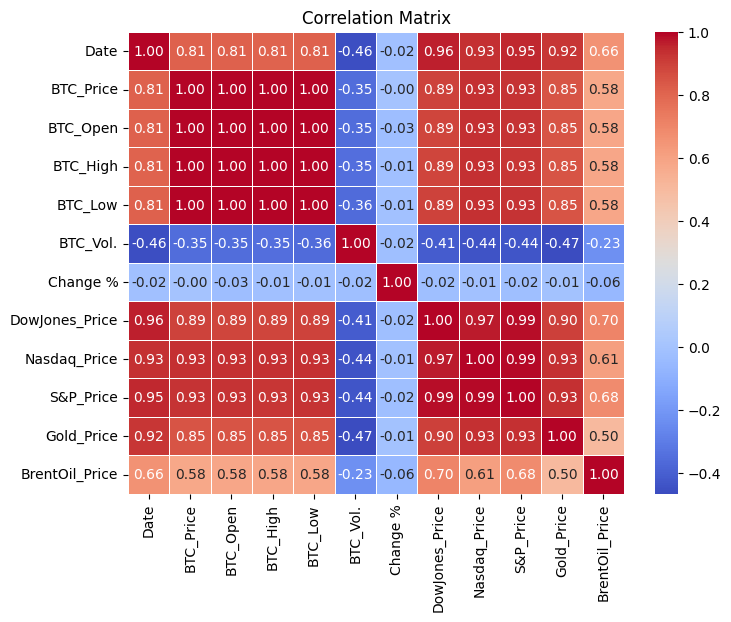

In [47]:
# Calculate the correlation matrix
correlation_matrix = HE.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## **1.3	Sentiment Analysis**
Sentiment analysis was done by web scraping over 2,700 pages of news articles about Bitcoin, extracting about 93,870 news titles using a natural language processing (NLP) model like bidirectional encoder representations from transformers (BERT), which specializes in capturing contextual information from language, was employed to help the system understand the context of an ambiguous text.

In [51]:
# Base URL of the cryptocurrency news page
base_url = 'https://www.investing.com/news/cryptocurrency-news'

# Headers to simulate a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.5938.132 Safari/537.36'
}
# Lists to store the data
all_times = []
all_titles = []


In [68]:
crypto_news = pd.read_excel("crypto_news.xlsx")
crypto_news

,Date,Title
0,"Sep 30, 2024",Impossible Cloud Network Launches ICNT: The To...
1,"Sep 30, 2024",Former Binance CEO Speaks out After Prison Rel...
2,"Sep 30, 2024",De.Fi World 2024 Set to Convene Industry Leade...
3,"Sep 30, 2024","Bitcoin Bull Michael Saylor Flexes 1,325% Gain..."
4,"Sep 30, 2024",World Mobile Launches on Base to Expand Global...
...,...,...
93864,"May 14, 2018",Odyssey (OCN) Falls After Extraordinary Rally...
93865,"May 14, 2018",Thailand: Legal Framework For Cryptocurrencies...
93866,"May 14, 2018",CME Group in deal to offer ether reference rate
93867,"May 14, 2018","EXCLUSIVE: Q&A with Loi Luu, Founder & CEO of..."


In [70]:
from tqdm import tqdm
from transformers import pipeline

# Load the BERT sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to process a batch of texts and perform sentiment analysis
def process_batch(texts):
    results = classifier(texts, truncation=True, max_length=512)
    sentiments = []  # List to store sentiment labels
    scores = []  # List to store sentiment scores

    # Loop through results to classify and score each sentiment
    for res in results:
        label = res['label']
        score = res['score']
        # Categorize sentiment based on the star rating
        if label == "1 star" or label == "2 stars":
            sentiments.append("Negative")
            scores.append(-score)  # Negative sentiment score
        elif label == "4 stars" or label == "5 stars":
            sentiments.append("Positive")
            scores.append(score)  # Positive sentiment score
        else:
            sentiments.append("Neutral")
            scores.append(0)  # Neutral sentiment score

    return sentiments, scores

# Initialize a DataFrame to store results
news_analysis = crypto_news.copy()
news_analysis['Sentiment'] = None
news_analysis['Sentiment_Score'] = None

# Process the news titles in batches
batch_size = 32
for i in tqdm(range(0, len(crypto_news), batch_size), desc="Processing Batches"):
    # Extract a batch of titles
    batch_titles = crypto_news['Title'][i:i + batch_size].tolist()

    # Get sentiment results for the batch
    sentiments, scores = process_batch(batch_titles)

    # Store the sentiment labels and scores in the DataFrame
    news_analysis.loc[i:i + batch_size - 1, 'Sentiment'] = sentiments
    news_analysis.loc[i:i + batch_size - 1, 'Sentiment_Score'] = scores

# Display the resulting DataFrame with sentiments
print(news_analysis.head())


In [ ]:
# Define the function to aggregate sentiments by date
def aggregate_sentiment_by_date(group):
    # Calculate the Weighted Average Sentiment (mean of sentiment scores)
    weighted_average = group['Sentiment_Score'].mean()

    # Find the Most Influential Sentiment (based on highest absolute score)
    most_influential_row = group.loc[group['Sentiment_Score'].abs().idxmax()]
    most_influential = most_influential_row['Sentiment']

    # Find the Majority Sentiment (most common sentiment)
    majority_sentiment = group['Sentiment'].value_counts().idxmax()

    # Return the aggregated results as a pandas Series
    return pd.Series({
        'Weighted_Average_Sentiment': weighted_average,
        'Most_Influential_Sentiment': most_influential,
        'Majority_Sentiment': majority_sentiment
    })
# Group the news_analysis DataFrame by Date and apply the aggregation function
Sentiment_analysis = news_analysis.groupby('Time').apply(aggregate_sentiment_by_date).reset_index()


In [67]:
Sentiment_analysis = pd.read_excel("Sentiment_analysis.xlsx")
Sentiment_analysis

,Date,Weighted_Average_Sentiment,Most_Influential_Sentiment,Majority_Sentiment
0,2018-05-14,0.110124,Positive,Positive
1,2018-05-15,0.117673,Negative,Positive
2,2018-05-16,-0.044261,Negative,Negative
3,2018-05-17,0.007733,Positive,Positive
4,2018-05-18,0.022261,Negative,Positive
...,...,...,...,...
2309,2024-09-29,0.447328,Positive,Positive
2310,2024-09-30,-0.051526,Negative,Positive
2311,2024-11-08,-0.155391,Positive,Negative
2312,2024-11-09,-0.077508,Positive,Negative


# **Merge Datasets:**
**1- BTC prices & Economic Indicators**
**2- Sentiment Analysis**

# **Final result unifined data set included:**
 **BTC prices & Economic Indicators & Sentiment Analysis**

In [75]:
# Merge the datasets on the 'Date' column with 'inner' join
Dataset = pd.merge(HE , Sentiment_analysis, on='Date', how='inner')

# Reorder columns
sentiment_columns = ['Weighted_Average_Sentiment', 'Most_Influential_Sentiment', 'Majority_Sentiment']
remaining_columns = [col for col in Dataset.columns if col not in sentiment_columns]

Dataset = Dataset[remaining_columns + sentiment_columns]

# Display the resulting DataFrame
Dataset



,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change %,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price,Weighted_Average_Sentiment,Most_Influential_Sentiment,Majority_Sentiment
0,2018-05-14,"8,670.8","8,683.8","8,882.4","8,279.5",37.15K,-0.15%,"24,899.41","7,411.31","2,730.10",1313.20,78.17,0.110124,Positive,Positive
1,2018-05-15,"8,467.5","8,668.5","8,838.0","8,420.7",26.21K,-2.34%,"24,706.41","7,351.63","2,711.40",1290.39,78.94,0.117673,Negative,Positive
2,2018-05-16,"8,336.1","8,467.0","8,488.7","8,103.6",32.76K,-1.55%,"24,768.93","7,398.30","2,722.50",1290.63,78.19,-0.044261,Negative,Negative
3,2018-05-17,"8,051.8","8,349.7","8,466.9","7,986.8",25.19K,-3.41%,"24,713.98","7,382.47","2,720.10",1290.73,80.09,0.007733,Positive,Positive
4,2018-05-18,"8,239.0","8,054.8","8,276.6","7,927.8",23.44K,2.32%,"24,715.09","7,354.34","2,713.00",1291.30,78.38,0.022261,Negative,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2024-09-26,"65,307.0","63,264.0","65,856.0","62,805.0",0.86K,3.23%,"42,175.11","18,190.29","5,745.37",2694.90,73.06,0.020917,Negative,Positive
2307,2024-09-27,"65,928.0","65,307.0","66,548.0","64,987.0",0.67K,0.95%,"42,313.00","18,119.59","5,738.17",2644.30,71.63,-0.120266,Negative,Negative
2308,2024-09-28,"66,015.0","65,928.0","66,410.0","65,568.0",0.11K,0.13%,NaN,NaN,NaN,NaN,NaN,-0.174357,Negative,Negative
2309,2024-09-29,"65,762.0","66,015.0","66,193.0","65,574.0",0.09K,-0.38%,NaN,NaN,NaN,NaN,NaN,0.447328,Positive,Positive


In [ ]:
# Save the final dataset to a CSV file for download
Dataset.to_csv("Merged_Dataset.csv", index=False)